#  Pandas CheatSheet

In [2]:
import pandas as pd
import numpy as np

DataFrame:

就是一个SQL的表格Tabel

一个张量(有时是一个矩阵), 标量是0阶张量，向量是1阶张量，矩阵是2阶张量，多维是二阶张量以上

一个DataFrame可以被表示成一个JSON, 也可以被表示成一个CSV， 可以被JSON所初始化

In [3]:
data0 = {
    'a':[1,2,3],
    'b':[4,5,6],
    'c':['Bob','Alice','Jack']
}
pd.DataFrame(data0)

,a,b,c
0,1,4,Bob
1,2,5,Alice
2,3,6,Jack


In [9]:
data = {'name': ['Alice', 'Bob', 'Charles', 'David', 'Eric'],
        'year': [2017, 2017, 2017, 2017,2017],#2017
        'salary': [40000, 24000, 31000, 20000, 30000],
        'pair':[{'a':1},{'a':2},{'a':3},{'a':4},{'a':5}]
       }
d = pd.DataFrame(data)

In [12]:
type(d.pair)

pandas.core.series.Series

In [14]:
d['pair']

0    {u'a': 1}
1    {u'a': 2}
2    {u'a': 3}
3    {u'a': 4}
4    {u'a': 5}
Name: pair, dtype: object

In [16]:
d.pair.tolist()

[{'a': 1}, {'a': 2}, {'a': 3}, {'a': 4}, {'a': 5}]

In [18]:
d.pair[0]

{'a': 1}

## 薪水大于20000的都有谁？

In [19]:
d.query('salary>20000')

,name,pair,salary,year
0,Alice,{u'a': 1},40000,2017
1,Bob,{u'a': 2},24000,2017
2,Charles,{u'a': 3},31000,2017
4,Eric,{u'a': 5},30000,2017


In [32]:
d.salary > 20000

0     True
1     True
2     True
3    False
4     True
Name: salary, dtype: bool

## Eric信息是什么？

In [27]:
d.query('name=="Eric"')

,name,pair,salary,year
4,Eric,{u'a': 5},30000,2017


In [28]:
d[d.name=='Eric']

,name,pair,salary,year
4,Eric,{u'a': 5},30000,2017


In [29]:
d.loc[d.name=='Eric']

,name,pair,salary,year
4,Eric,{u'a': 5},30000,2017


## 联合查找：名叫Bob且薪水大于20000

In [31]:
d.query("name=='Bob' and salary > 20000")

,name,pair,salary,year
1,Bob,{u'a': 2},24000,2017


# 列操作

在SQL忠经常使用的 select anme, year, salary from T where salary > 20000 and name=='Eric' 事实上是对于二阶

filter

In [ ]:
d.filter

In [35]:
d[['name', 'year']]

,name,year
0,Alice,2017
1,Bob,2017
2,Charles,2017
3,David,2017
4,Eric,2017


## 模糊查找

In [37]:
d.filter(like='2', axis=0)

,name,pair,salary,year
2,Charles,{u'a': 3},31000,2017


In [39]:
d.filter(like='ea', axis=1) # 模糊查找列

,year
0,2017
1,2017
2,2017
3,2017
4,2017


# 分组

In [41]:
df1 = pd.DataFrame({ 
    "Name" : ["Alice", "Ada", "Mallory", "Mallory", "Billy" , "Mallory"] , 
    "City" : ["Sydney", "Sydney", "Paris", "Sydney", "Sydney", "Paris"]})

In [43]:
df1

,City,Name
0,Sydney,Alice
1,Sydney,Ada
2,Paris,Mallory
3,Sydney,Mallory
4,Sydney,Billy
5,Paris,Mallory


## 各自城市有多少人

In [46]:
df1.groupby(['City']).count()

,Name
City,
Paris,2
Sydney,4


# 统计量分析

Numerical 变量的数据分析

In [49]:
d.describe()

,salary,year
count,5.000000,5.0
mean,29000.000000,2017.0
std,7615.773106,0.0
min,20000.000000,2017.0
25%,24000.000000,2017.0
50%,30000.000000,2017.0
75%,31000.000000,2017.0
max,40000.000000,2017.0


## 统计函数 

In [9]:
df2 = pd.DataFrame({
    'key1':['a', 'a', 'b', 'b', 'a'],
    'key2':['one', 'two', 'one', 'two', 'one'],
    'data1':np.random.randn(5),'data2':np.random.randn(5)})

In [55]:
df2

,data1,data2,key1,key2
0,-0.127402,0.718635,a,one
1,-2.013303,-0.444732,a,two
2,0.307584,0.771780,b,one
3,-0.267971,0.267904,b,two
4,0.321170,-0.166257,a,one


## 基于属性Key1的类型a和b各自的均值是多少(包括data1和data2但是不包括key2)

In [57]:
df2.groupby(['key1']).mean()

,data1,data2
key1,,
a,-0.606512,0.035882
b,0.019807,0.519842


In [59]:
df2.groupby(['key1','key2']).mean()

data1     data2
key1 key2                    
a    one   0.096884  0.276189
     two  -2.013303 -0.444732
b    one   0.307584  0.771780
     two  -0.267971  0.267904

In [61]:
df2.count()

data1    5
data2    5
key1     5
key2     5
dtype: int64

# 排序

In [63]:
df2

,data1,data2,key1,key2
0,-0.127402,0.718635,a,one
1,-2.013303,-0.444732,a,two
2,0.307584,0.771780,b,one
3,-0.267971,0.267904,b,two
4,0.321170,-0.166257,a,one


In [64]:
df2.data2.sort_values() # 对于列进行排序

1   -0.444732
4   -0.166257
3    0.267904
0    0.718635
2    0.771780
Name: data2, dtype: float64

In [65]:
df2.sort_values(by='key2') # 整张表按照某一列的数值进行排序

,data1,data2,key1,key2
0,-0.127402,0.718635,a,one
2,0.307584,0.771780,b,one
4,0.321170,-0.166257,a,one
1,-2.013303,-0.444732,a,two
3,-0.267971,0.267904,b,two


In [67]:
df2.sort_values(by=['key1', 'key2'])

,data1,data2,key1,key2
0,-0.127402,0.718635,a,one
4,0.321170,-0.166257,a,one
1,-2.013303,-0.444732,a,two
2,0.307584,0.771780,b,one
3,-0.267971,0.267904,b,two


In [68]:
df2.sort_values(by=['key1', 'key2'], ascending=False)

,data1,data2,key1,key2
3,-0.267971,0.267904,b,two
2,0.307584,0.771780,b,one
1,-2.013303,-0.444732,a,two
0,-0.127402,0.718635,a,one
4,0.321170,-0.166257,a,one


### 使用iloc获取dataframe的某行某列

In [5]:
df2.groupby(['key1']).count().loc['a']

data1    3
data2    3
key2     3
Name: a, dtype: int64

### 打印前两行和后两列

In [8]:
df2.iloc[:2,]
df2.iloc[:,-2:]

,key1,key2
0,a,one
1,a,two
2,b,one
3,b,two
4,a,one


### 数据的修改

In [14]:
df2.iat[1,3] = -2.0
df2

,data1,data2,key1,key2
0,-1.640993,-0.278884,a,one
1,1.652490,-3.256745,a,-2
2,-0.678246,1.504518,b,one
3,0.945440,0.639523,b,two
4,0.888511,0.595567,a,one


In [13]:
df2.iloc[1,3] = -3
df2

,data1,data2,key1,key2
0,-1.640993,-0.278884,a,one
1,1.652490,-3.256745,a,-3
2,-0.678246,1.504518,b,one
3,0.945440,0.639523,b,two
4,0.888511,0.595567,a,one


### 增加行
.append()
对于dataframe，每一行事实上代表一个对象/向量，对于对象/向量的表示，用json

In [20]:
df3 = df2.append({'data1':1.2, 'data2':1.4, 'key1':'b', 'key2':'two'}, ignore_index=True)

### 增加列
.assign()

In [31]:
df4 = df3.assign(key3=[1,2,3,4,5,6])
df4

,data1,data2,key1,key2,key4,key3
0,-1.640993,-0.278884,a,one,6,1
1,1.652490,-3.256745,a,-2,5,2
2,-0.678246,1.504518,b,one,4,3
3,0.945440,0.639523,b,two,3,4
4,0.888511,0.595567,a,one,2,5
5,1.200000,1.400000,b,two,1,6


In [25]:
df3.loc[:,'key3'] = [6,5,4,3,2,1]
df3

,data1,data2,key1,key2,key4,key3
0,-1.640993,-0.278884,a,one,6,6
1,1.652490,-3.256745,a,-2,5,5
2,-0.678246,1.504518,b,one,4,4
3,0.945440,0.639523,b,two,3,3
4,0.888511,0.595567,a,one,2,2
5,1.200000,1.400000,b,two,1,1


loc: only work on index

iloc: work on position

ix: You can get data from dataframe without it being in the index

at: get scalar values. It's a very fast loc

iat: Get scalar values. It's a very fast iloc

Note: As of pandas 0.20.0, the .ix indexer is deprecated in favour of the more strict .iloc and .loc indexers.

# Dataframe 自带绘图

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data3 = {'name': ['Jason', 'Molly', 'Tina', 'Jake', 'Amy'], 'year': [2012, 2012, 2013, 2014, 2014], 'reports': [4, 24, 31, 2, 3]}
df3 = pd.DataFrame(data3, index = ['Cochice', 'Pima', 'Santa Cruz', 'Maricopa', 'Yuma'])
df3

,name,year,reports
Cochice,Jason,2012,4
Pima,Molly,2012,24
Santa Cruz,Tina,2013,31
Maricopa,Jake,2014,2
Yuma,Amy,2014,3


In [40]:
df3['reports']

Cochice        4
Pima          24
Santa Cruz    31
Maricopa       2
Yuma           3
Name: reports, dtype: int64

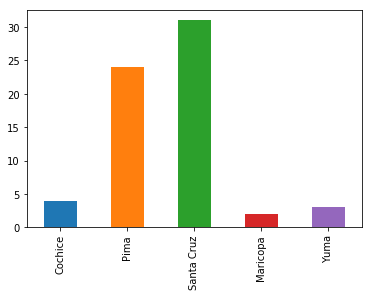

In [41]:
df3['reports'].plot.bar()

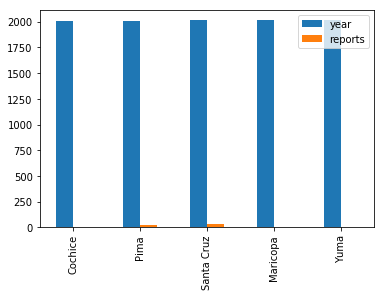

In [3]:
df3.plot.bar()

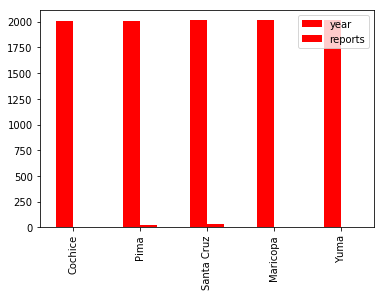

In [4]:
df3.plot.bar(color='r')

In [6]:
df3

,name,year,reports
Cochice,Jason,2012,4
Pima,Molly,2012,24
Santa Cruz,Tina,2013,31
Maricopa,Jake,2014,2
Yuma,Amy,2014,3


## 密度估计（Kernel Density Estimation)

In [7]:
import seaborn as sns

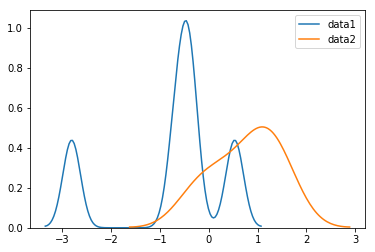

In [11]:
sns.kdeplot(df2['data1'])
sns.kdeplot(df2['data2'])

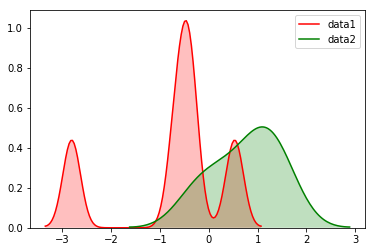

In [12]:
sns.kdeplot(df2['data1'], shade=True, color='r')
sns.kdeplot(df2['data2'], shade=True, color='g')

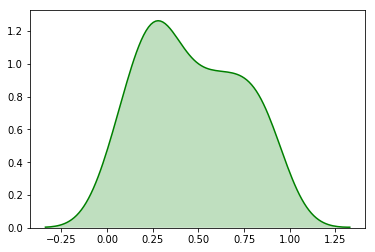

In [44]:
x=np.random.rand(50)
sns.kdeplot(x, shade=True, color='g')

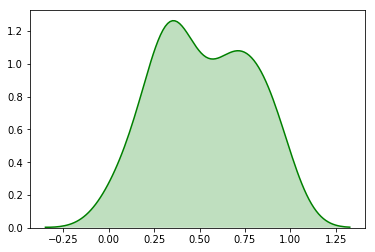

In [45]:
x=np.random.rand(50)
sns.kdeplot(x, shade=True, color='g')